In [1]:
import numpy as np
import matplotlib.pyplot as plt
from docx import Document
from matplotlib.pyplot import MultipleLocator

In [2]:
#精确值计算
from sympy import *
x = symbols('x')
ytrue=integrate(x**2+cos(x+3),(x,-2,3))
print(ytrue)
print(type(ytrue))

-sin(1) + sin(6) + 35/3
<class 'sympy.core.add.Add'>


In [3]:
ytrue=35/3+np.sin(5)

In [4]:
def Monka(a,b,fun,n):
    xlist=(b-a)*np.random.random(n)+a
    sum1=0
    for i in xlist:
        y=fun(i)*(b-a)
        sum1=sum1+y
    result=sum1/n
    return result

In [5]:
def self_adpt(a,b,fun,eneed,n):
    iterlist=[]#储存迭代次数
    errlist=[]#储存与精确值的差值
    nlist=[]#储存n点个数
    resultlist=[]#储存两次迭代之差
    itermin=1#最小迭代次数
    itermax=20#最大迭代次数
    resultsave=[]
    tempold=Monka(a,b,fun,n)
    while itermin<itermax:
        n=n*2
        nlist.append(n)
        tempnew=Monka(a,b,fun,n)
        resultlist.append(tempnew-ytrue)
        err=tempnew-tempold
        iterlist.append(itermin)
        errlist.append(err)
        if abs(err)<eneed:
            print(err)
            print(eneed)
            break
        else:
            itermin=itermin+1
            tempold=tempnew
            resultsave.append(tempold)
            print("iteration",itermin,"n",n)
        if itermin==itermax:
            print("在设定收敛次数内无法达到所需的收敛精度要求")
    return iterlist,errlist,nlist,resultlist,tempold,resultsave    

In [6]:
def picture(a,b):#收敛曲线的绘制
    fig=plt.figure(figsize=(7,7),dpi=100)
    plt.title("Monka收敛曲线")
    plt.xlabel("iter")
    plt.ylabel("两次计算之差")
    plt.rcParams['font.sans-serif']=['Simhei']
    plt.rcParams['axes.unicode_minus']=False
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(1,len(a))
    plt.ylim(int(min(b)-1),int(max(b))+1)
    plt.plot(a,b)
    plt.show()
def picture2(a,b):#与精确值误差曲线绘制
    fig=plt.figure(figsize=(7,7),dpi=100)
    a=[np.log10(i) for i in a]
    plt.title("Monka与精确值误差曲线")
    plt.xlabel("log10(n)")
    plt.ylabel("与精确值的误差")
    plt.rcParams['font.sans-serif']=['Simhei']
    plt.rcParams['axes.unicode_minus']=False
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax1=plt.gca()
    ax1.xaxis.set_major_locator(x_major_locator)
    ax1.yaxis.set_major_locator(y_major_locator)
    plt.xlim(1,int(max(a)))
    plt.ylim(int(min(b)-1),int(max(b))+1)
    plt.plot(a,b)
    plt.show() 

In [7]:
a=-2
b=3
fun = lambda x:x**2+np.cos(x+2)
n=20
iterlist,errlist,nilst,resultlist,tempold,resultsave=self_adpt(a,b,fun,10**-5,n)
result=tempold
print("最终计算结果为：",tempold)
print("精确值为:",ytrue)
print("与精确值的差值为：",tempold-ytrue)

iteration 2 n 40
iteration 3 n 80
iteration 4 n 160
iteration 5 n 320
iteration 6 n 640
iteration 7 n 1280
iteration 8 n 2560
iteration 9 n 5120
iteration 10 n 10240
iteration 11 n 20480
iteration 12 n 40960
iteration 13 n 81920
iteration 14 n 163840
iteration 15 n 327680
iteration 16 n 655360
iteration 17 n 1310720
iteration 18 n 2621440
iteration 19 n 5242880
iteration 20 n 10485760
在设定收敛次数内无法达到所需的收敛精度要求
最终计算结果为： 10.69989104640235
精确值为: 10.707742392003528
与精确值的差值为： -0.007851345601178394


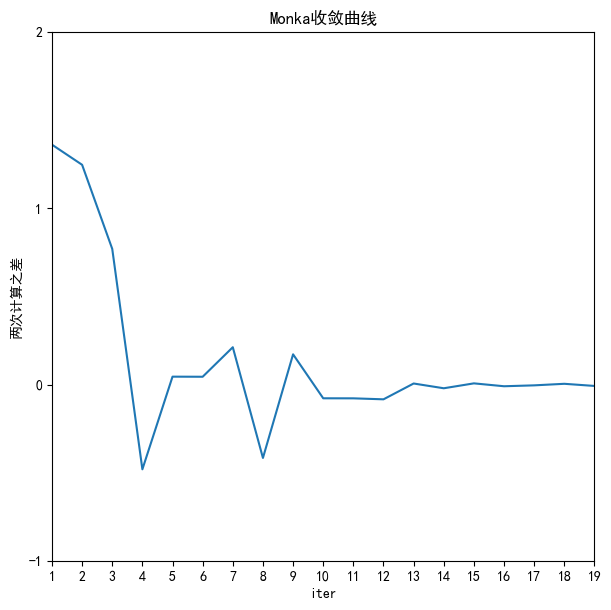

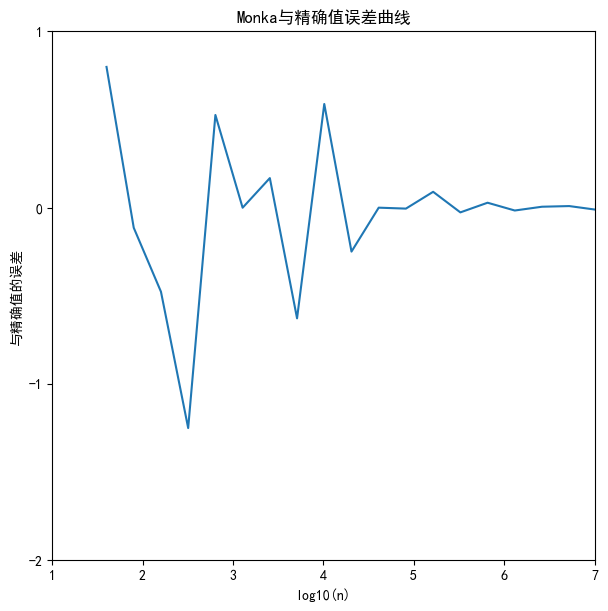

In [8]:
picture(iterlist,resultlist)
picture2(nilst,errlist)

In [9]:
x=len(resultlist)
document_1 = Document()
document_1.add_heading("输出表格——word")
table = document_1.add_table(rows=x+1, cols=3, style='Table Grid')
hc = table.rows[0].cells
hc[0].text = 'Iteration'
hc[1].text = 'No.of Points'
hc[2].text = 'Result'
for i in range(1,x+1):
    bc1 = table.rows[i].cells
    bc1[0].text=str(iterlist[i-1])
    bc1[1].text=str(nilst[i-1])
    bc1[2].text=str(resultsave[i-1])
document_1.add_paragraph('计算结束')
document_1.add_paragraph(' 当然也有收敛的办法，就是将蒙卡特罗算法进行分段蒙卡特罗，使得蒙卡特罗总体更加均匀。')
document_1.add_paragraph(' 相当于在蒙卡特罗里掺入矩形法，当n特别大时，和矩形法也差不多，精度还更低。')
document_1.add_paragraph(' 所以我觉得与其这么干，不如直接采用矩形法。。')
document_1.save('test.docx')

# 当然也有收敛的办法

就是将蒙卡特罗算法进行分段蒙卡特罗，使得蒙卡特罗总体更加均匀。

相当于在蒙卡特罗里掺入矩形法，当n特别大时，和矩形法也差不多，精度还更低。

所以我觉得与其这么干，不如直接采用矩形法。